In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

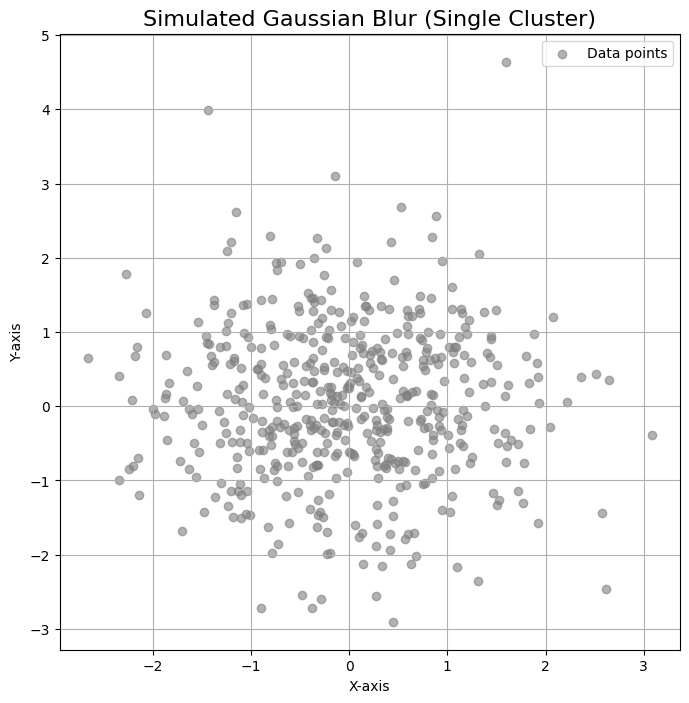

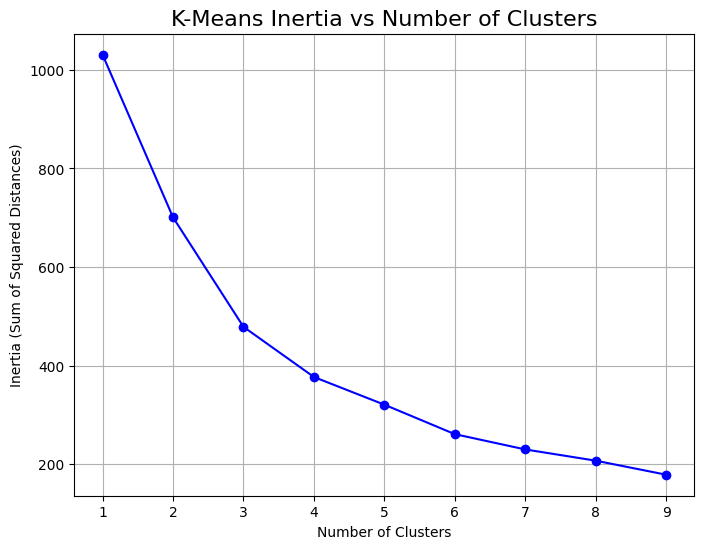

In [2]:
# Parameters for the Gaussian blur
n_points = 500  # Number of data points
center = [0, 0]  # Centroid location
blur = 1.0       # Standard deviation of the Gaussian blur

# Generate a single Gaussian cluster
data = np.random.normal(loc=center, scale=blur, size=(n_points, 2))

# Range of clusters to try
num_clusters = range(1, 10)

# Store inertia (sum of squared distances) for each k
inertia_values = []

# Apply k-means for different numbers of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, label='Data points')
plt.title("Simulated Gaussian Blur (Single Cluster)", fontsize=16)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia_values, marker='o', color='blue')
plt.title("K-Means Inertia vs Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()


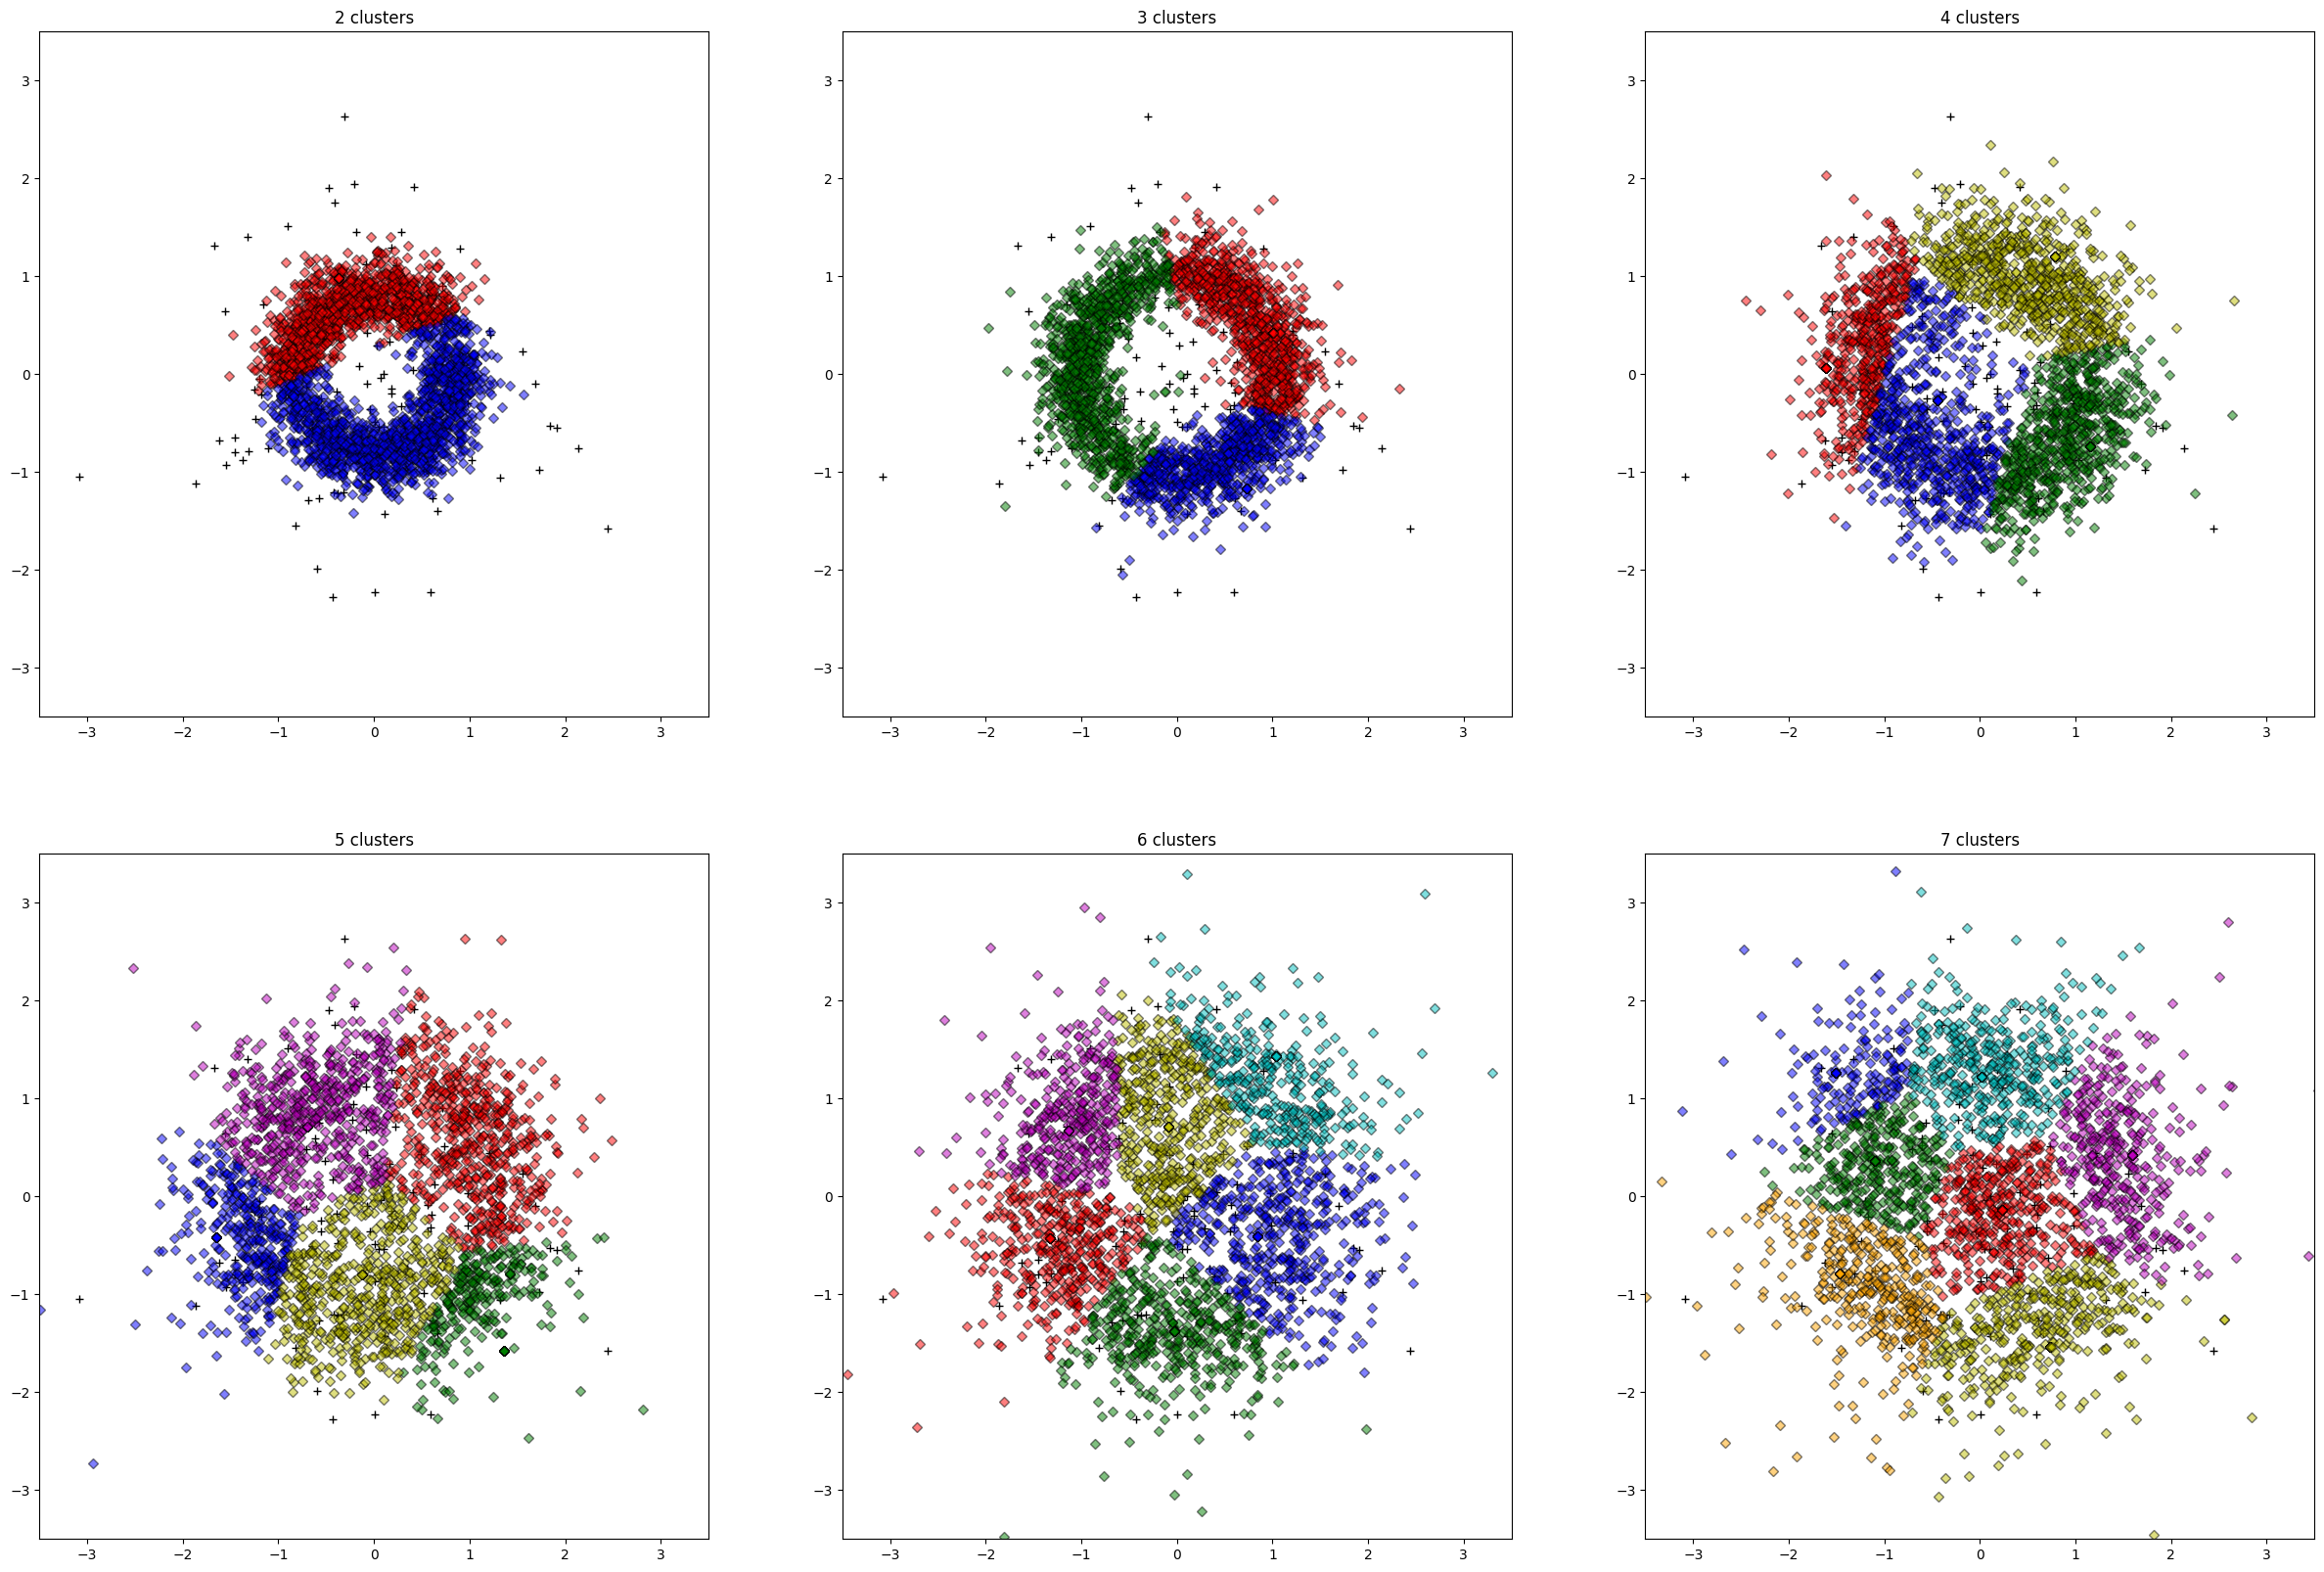

In [4]:
import numpy.linalg as la

## Do a test to see multiple cluster centers
 
# experiment parameters
ks = np.arange(2, 8)
totalCentroids = 3000
expData = [
    np.zeros((
        int(np.ceil(totalCentroids/k)), # represents the number of experiments to run per k.
                                        # division is so that there's around the same amount of centroids per k
        k, 2
    )) for k in ks
]
 
# data parameters
C = [0, 0]
N = 100
blurX = 1
blurY = 1
 
for ki, k in enumerate(ks):
    model = KMeans(n_clusters=k, n_init='auto')
    for expi in range(len(expData[ki])):
    
        data = np.array([
            C[0] + np.random.randn(N)*blurX,
            C[1] + np.random.randn(N)*blurY
        ]).T
        
        model.fit(data).predict(data)
        cents = model.cluster_centers_
        sortedCents = np.zeros((k, 2))
 
        # Used for sorting the clusters so we can group them by color in the graphs
        if expi == 0:
            baseCents = cents
            expData[ki][expi] = cents
        else:
            # SORTING BUSINESSS
            for i in range(k):
                dists = la.norm(baseCents - cents[i], axis=1)
                idx = np.argmin(dists)
                sortedCents[idx] = cents[i]
            # Crude way to account for the leftovers
            sortedCents[sortedCents == [0, 0]] = baseCents[sortedCents == [0, 0]]
            expData[ki][expi] = sortedCents
 
 
# DO SOME PLOTTING
colors = [
    'r', 'b', 'g', 'y', 'm', 'c', 'orange'
]
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
 
for i, kData in enumerate(expData):
    a = ax.flat[i]
    a.set_title(f'{ks[i]} clusters')
    a.set_xlim([-3.5*blurX, 3.5*blurX])
    a.set_ylim([-3.5*blurY, 3.5*blurY])
    a.plot(data[:,0], data[:,1], 'k+')
    for ki in range(ks[i]):
        a.plot(kData[:,ki,0], kData[:,ki,1], color=colors[ki], marker='D', lw=0, mec='k', ms=5, alpha=.5)